In [1]:
# -*- coding: utf-8 -*-
"""
문2) 아래와 같은 단계로 kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.

 <조건> 변수 설명 : tot_price : 총구매액, buy_count : 구매횟수, 
                   visit_count : 매장방문횟수, avg_price : 평균구매액

  단계1 : 3개 군집으로 군집화
 
  단계2: 원형데이터에 군집 예측치 추가
  
  단계3 : tot_price 변수와 가장 상관계수가 높은 변수로 산점도(색상 : 클러스터 결과)
  
  단계4 : 산점도에 군집의 중심점 시각화
"""

import pandas as pd
from sklearn.cluster import KMeans # kMeans model
import matplotlib.pyplot as plt


sales = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/chap10_Recomm/data/product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [2]:
model = KMeans(n_clusters=3, random_state=0, algorithm='auto') # k=3, auto:default
model.fit(sales)

KMeans(n_clusters=3, random_state=0)

In [3]:
# kMeans model 에측치 
pred = model.predict(sales)
print(pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2
 2 2 0 2 2 2 0 2 2 2 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [5]:
# 예측치 추가 
sales['predict'] = pred # column 추가 = numpy vector 추가 가능 
sales

,tot_price,visit_count,buy_count,avg_price,predict
0,5.0,0.2,3.0,1.6,1
1,5.0,0.4,3.4,1.6,1
2,5.2,0.2,3.5,1.5,1
3,5.2,0.2,3.0,1.4,1
4,4.7,0.2,3.2,1.6,1
...,...,...,...,...,...
145,5.4,0.2,3.4,1.7,1
146,5.1,0.4,2.0,1.5,1
147,4.6,0.2,3.6,1.0,1
148,5.1,0.5,3.3,1.7,1


In [7]:
# 상관계수
sales.corr() # tot_price vs avg_price

,tot_price,visit_count,buy_count,avg_price,predict
tot_price,1.000000,0.817954,-0.013051,0.871754,0.349480
visit_count,0.817954,1.000000,-0.230612,0.962757,0.203263
buy_count,-0.013051,-0.230612,1.000000,-0.278505,0.333204
avg_price,0.871754,0.962757,-0.278505,1.000000,0.170493
predict,0.349480,0.203263,0.333204,0.170493,1.000000


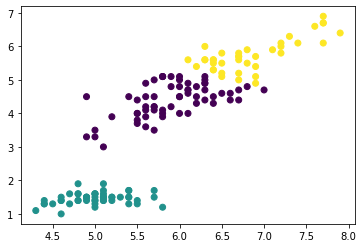

In [8]:
# tot_price vs avg_price 산점도  
plt.scatter(sales['tot_price'], sales['avg_price'], c=sales.iloc[:,4])

In [10]:
# 군집 중앙값  
centers = model.cluster_centers_
centers

array([[5.9016129 , 1.43387097, 2.75483871, 4.39354839],
       [5.006     , 0.244     , 3.284     , 1.464     ],
       [6.85      , 2.07105263, 3.07105263, 5.74210526]])

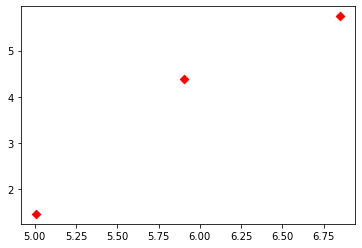

In [11]:
# 중앙값 시각화 
plt.scatter(centers[:,0], centers[:, 3], marker='D', c='r')
plt.show()